<a href="https://colab.research.google.com/github/MacsEli/DocumentosDeClase/blob/main/USL_Model_Evaluation_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Databases/Week 19/df_german_credit.csv')

In [ ]:
#Ver que tipo de usuasrio tenemos en el banco
#Para lanzar o dirigir promociones hacia ellos
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,housing_encoded,sex_encoded
0,0,67,male,2,own,little,little,1169,6,radio/TV,1,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,1,0
2,2,49,male,1,own,little,little,2096,12,education,1,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,0,1
4,4,53,male,2,free,little,little,4870,24,car,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,little,1736,12,furniture/equipment,1,0
996,996,40,male,3,own,little,little,3857,30,car,1,1
997,997,38,male,2,own,little,little,804,12,radio/TV,1,1
998,998,23,male,2,free,little,little,1845,45,radio/TV,0,1


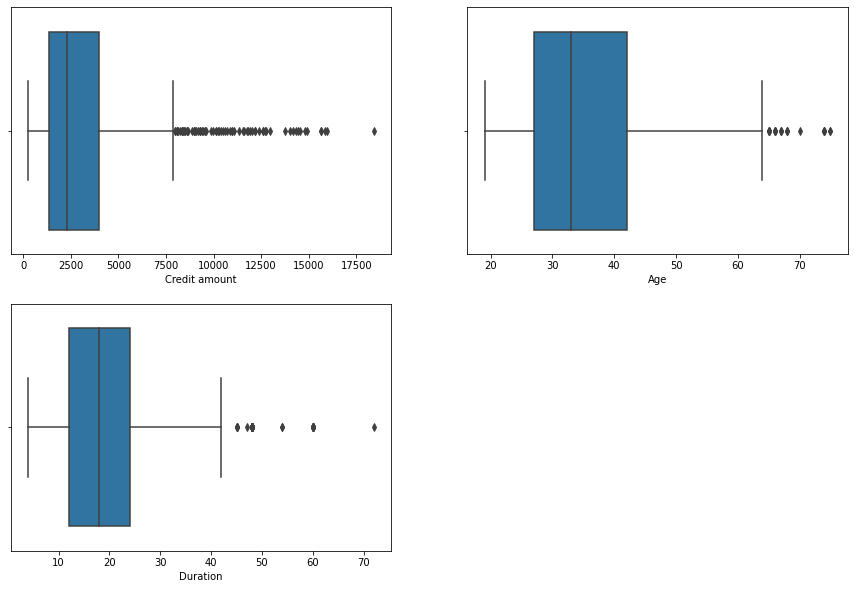

In [ ]:
numerical = ['Credit amount','Age','Duration']
fig = plt.figure(figsize=(15,10))
#nrows,ncols,index
axes=220
for num in numerical:
  axes+=1
  fig.add_subplot(axes)
  sns.boxplot(data=df,x=num)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

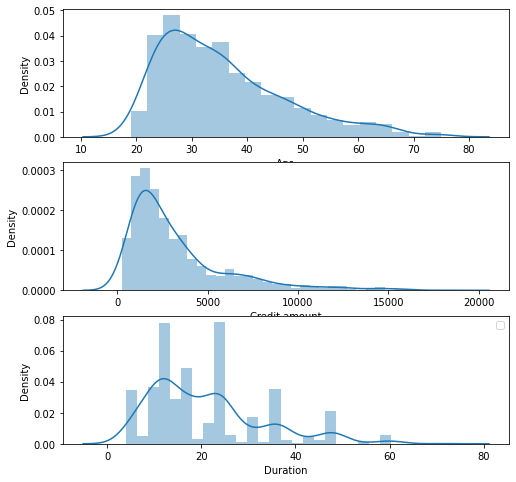

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df['Age'],ax=ax1)
sns.distplot(df['Credit amount'],ax=ax2)
sns.distplot(df['Duration'],ax=ax3)
plt.legend()

In [ ]:
df_cluster = pd.DataFrame()
df_cluster['Credit amount'] = df['Credit amount']
df_cluster['Age'] = df['Age']
df_cluster['Duration'] =df['Duration']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

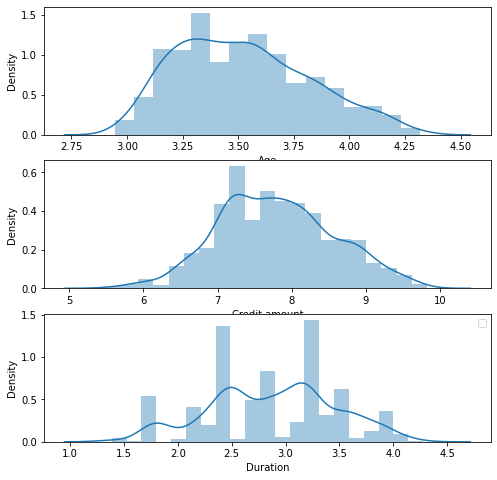

In [ ]:
df_cluster_log = np.log(df_cluster[['Age','Duration','Credit amount']])
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df_cluster_log['Age'],ax=ax1)
sns.distplot(df_cluster_log['Credit amount'],ax=ax2)
sns.distplot(df_cluster_log['Duration'],ax=ax3)
plt.legend()


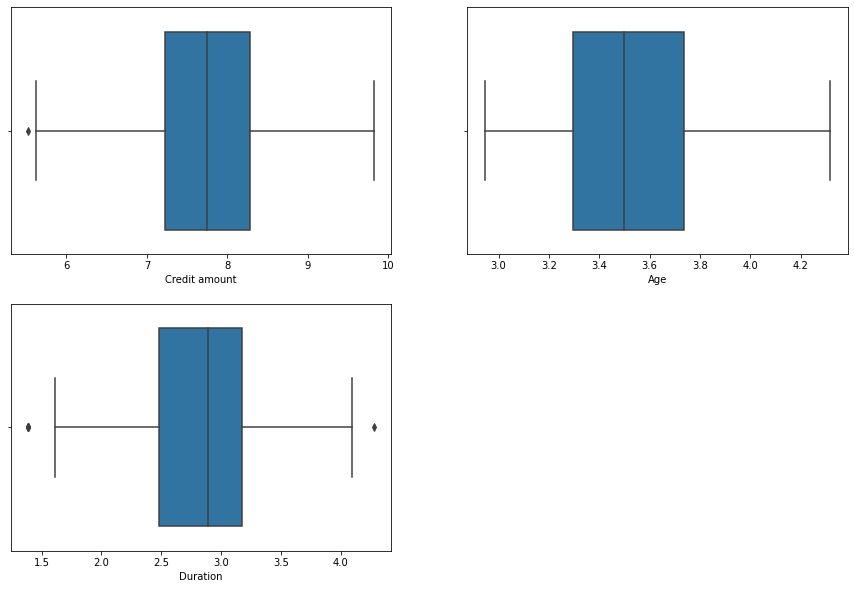

In [ ]:
fig = plt.figure(figsize=(15,10))
#nrows,ncols,index
axes=220
for num in numerical:
  axes+=1
  fig.add_subplot(axes)
  sns.boxplot(data=df_cluster_log,x=num)
plt.show()

In [ ]:
#
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
cluster_scaled = scale.fit_transform(df_cluster_log)

In [ ]:
cluster_scaled

array([[ 2.27100592, -1.86486906, -0.933901  ],
       [-1.44615223,  1.7083687 ,  1.16304581],
       [ 1.22669602, -0.67378981, -0.1815588 ],
       ...,
       [ 0.37810951, -0.67378981, -1.4161991 ],
       [-1.29778048,  1.59746802, -0.34591111],
       [-0.76258638,  1.59746802,  0.82450846]])

#Silhoutte Score
Mide la separabilidad entre clusters. Esta técnica mide la separabilidad entre grupos. Primero, se encuentra una distancia promedio entre cada punto y todos los demás puntos en un grupo. Luego mide la distancia entre cada punto y cada punto en otros grupos. Restamos las dos medidas promedio y dividimos por el promedio que sea mayor.

Nos ayuda a obtener numero de clusters optimo

In [ ]:
from sklearn import metrics
scores=[]
inertias= []
values = np.arange(2,10)
#
for num_clusters in values:
  kmeans=KMeans(n_clusters=num_clusters)
  kmeans.fit(cluster_scaled)
  #Pasamos nuestro dataset, nuestros clusters, nuestra metrida/meduida,tamaño de la muestra para el score
  score = metrics.silhouette_score(cluster_scaled,kmeans.labels_,metric='euclidean',sample_size=len(cluster_scaled))
  print('\n Numero de clusters =',num_clusters)
  print('Silhouette Score =',score)
  scores.append(score)

  #Queremos una puntuación (score) alta, es decir entre más cerca a 1 mejor.
  #Indicaría es que hay una distancia pequeña promedio entre cada miembro del grupo
  #Entre cada cluster va a existir una considerable distancia


 Numero de clusters = 2
Silhouette Score = 0.3153441336069185

 Numero de clusters = 3
Silhouette Score = 0.30281959056512314

 Numero de clusters = 4
Silhouette Score = 0.26770744059042884

 Numero de clusters = 5
Silhouette Score = 0.26745665373123884

 Numero de clusters = 6
Silhouette Score = 0.26484613480704844

 Numero de clusters = 7
Silhouette Score = 0.25911546755077525

 Numero de clusters = 8
Silhouette Score = 0.25800450274610265

 Numero de clusters = 9
Silhouette Score = 0.2586753653806931


<BarContainer object of 8 artists>

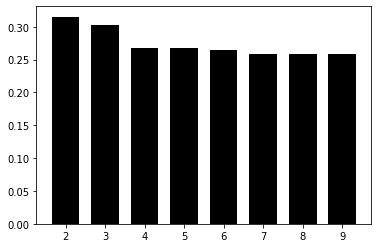

In [ ]:
plt.figure()
plt.bar(values, scores, width=.7, color='k',align='center')


#Elbow Method

El resultado es un grafico de linea que muesta la suma de las distancias al cuadrado de cada grupo.

Lo que equeremos es la suma de distancias al cuadrado menor, lo cual nos va a decir que los datos en esos grupos están mas "juntos"

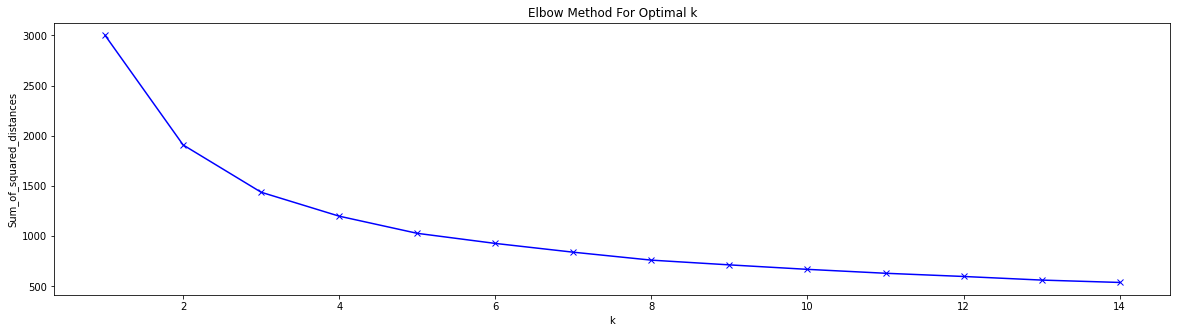

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


#Visualizaciones en 3D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

K-Means


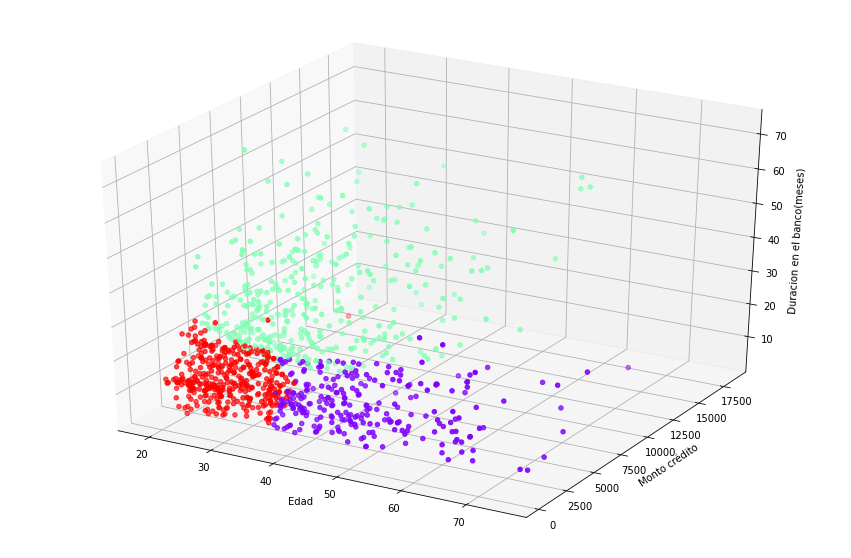

In [ ]:
model = KMeans(n_clusters=3, random_state=123)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

#Codigo para graficar
fig = plt.figure(num=None,figsize=(15,10),facecolor='w',edgecolor='k')
ax = plt.axes(projection='3d')
# Scatter 3D
ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=kmeans_labels,cmap='rainbow')

#Etiquetar los ejes
xlabel= ax.set_xlabel('Edad', linespacing =3.2)
ylabel= ax.set_ylabel('Monto crédito', linespacing =3.2)
zlabel= ax.set_zlabel('Duracion en el banco(meses)', linespacing =3.2)
print('K-Means')


In [ ]:
#Visualizacion interactiva
import plotly.graph_objs as go

escena = dict(xaxis = dict(title='Age'),yaxis = dict(title='Credit amount'),zaxis = dict(title='Duration'))
kmeans_labels = model.labels_
#GRaficamos a los users
puntitos = go.Scatter3d(x = df_cluster['Age'],y=df_cluster['Credit amount'],z=df_cluster['Duration'],mode='markers',marker=dict(color=kmeans_labels,size=10,line=dict(color='gray',width=5)))
#Lienzo del layout
layout = go.Layout(margin=dict(l=0,r=0),scene=escena, height = 1000, width=1000,showlegend=True)
data=[puntitos]
#Unimos nuestro layout (tiene nuestra escena) con nuestros puntitos
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
df_clustered_kmeans = df_cluster.assign(Cluster = kmeans_labels)
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Credit amount,Age,Duration
Cluster,,,
0,1978.7,48.7,13.9
1,5665.4,34.0,32.2
2,1733.6,27.8,14.2


#Agglomerative Clustering
Agglomerative Clustering es un miembro de la familia Hierarchical Clustering que funciona fusionando cada grupo con el proceso que se repite hasta que todos los datos se han convertido en un solo grupo.

Los pasos que da el agrupamiento aglomerativo son:

Cada punto de datos se asigna como un solo grupo
Determine la medida de la distancia y calcule la matriz de distancia
Determinar los criterios de vinculación para fusionar los clústeres.
Actualizar la matriz de distancias
Repita el proceso hasta que cada punto de datos se convierta en un grupo

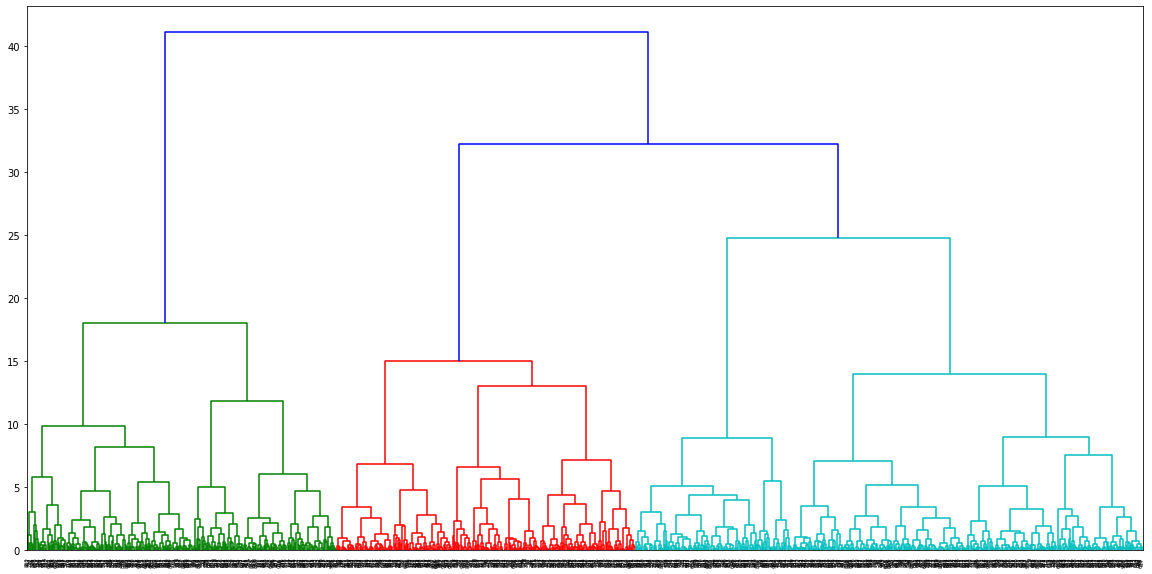

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,10))
dendograma= sch.dendrogram(sch.linkage(cluster_scaled,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
scores=[]
inertias= []
values = np.arange(2,10)
#
for num_clusters in values:
  ac=AgglomerativeClustering(n_clusters=num_clusters)
  ac.fit(cluster_scaled)
  #Pasamos nuestro dataset, nuestros clusters, nuestra metrida/meduida,tamaño de la muestra para el score
  score = metrics.silhouette_score(cluster_scaled,ac.labels_,metric='euclidean',sample_size=len(cluster_scaled))
  print('\n Numero de clusters =',num_clusters)
  print('Silhouette Score =',score)
  scores.append(score)

  #Queremos una puntuación (score) alta, es decir entre más cerca a 1 mejor.
  #Indicaría es que hay una distancia pequeña promedio entre cada miembro del grupo
  #Entre cada cluster va a existir una considerable distancia


 Numero de clusters = 2
Silhouette Score = 0.271523925266929

 Numero de clusters = 3
Silhouette Score = 0.24114611066359176

 Numero de clusters = 4
Silhouette Score = 0.23516132192529002

 Numero de clusters = 5
Silhouette Score = 0.2263787861134774

 Numero de clusters = 6
Silhouette Score = 0.20657375240773734

 Numero de clusters = 7
Silhouette Score = 0.20077965194694677

 Numero de clusters = 8
Silhouette Score = 0.20797768642134373

 Numero de clusters = 9
Silhouette Score = 0.2053220139842984


HIerarchical Clustering


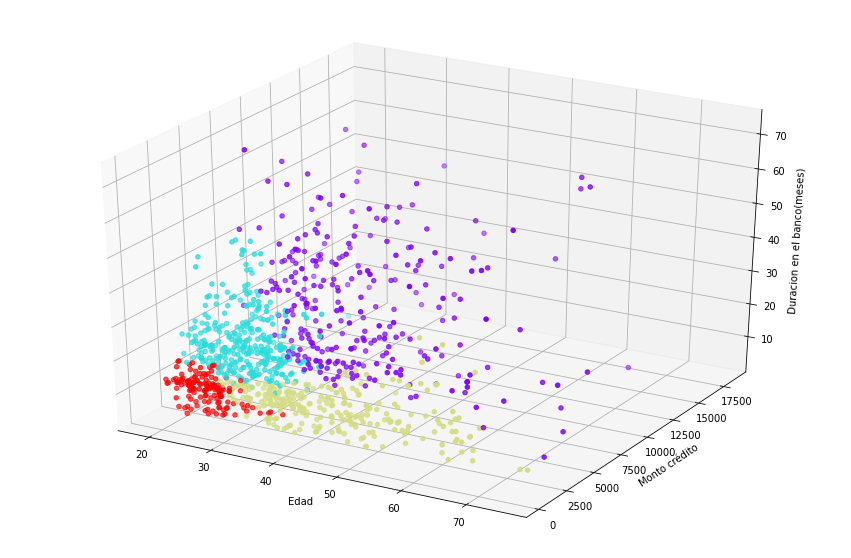

In [ ]:
model = AgglomerativeClustering(n_clusters=4)
model.fit(cluster_scaled)
hac_labels = model.labels_

#Codigo para graficar
fig = plt.figure(num=None,figsize=(15,10),facecolor='w',edgecolor='k')
ax = plt.axes(projection='3d')
# Scatter 3D
ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=hac_labels,cmap='rainbow')

#Etiquetar los ejes
xlabel= ax.set_xlabel('Edad', linespacing =3.2)
ylabel= ax.set_ylabel('Monto crédito', linespacing =3.2)
zlabel= ax.set_zlabel('Duracion en el banco(meses)', linespacing =3.2)
print('HIerarchical Clustering')


In [ ]:
df_clustered_hier = df_cluster.assign(Cluster = hac_labels)
grouped_hier = df_clustered_hier.groupby(['Cluster']).mean().round(1)
grouped_hier

,Credit amount,Age,Duration
Cluster,,,
0,6477.0,40.4,32.0
1,2748.0,28.8,23.6
2,1644.1,44.0,11.7
3,1231.5,25.1,10.6


DBSCAN Clustering


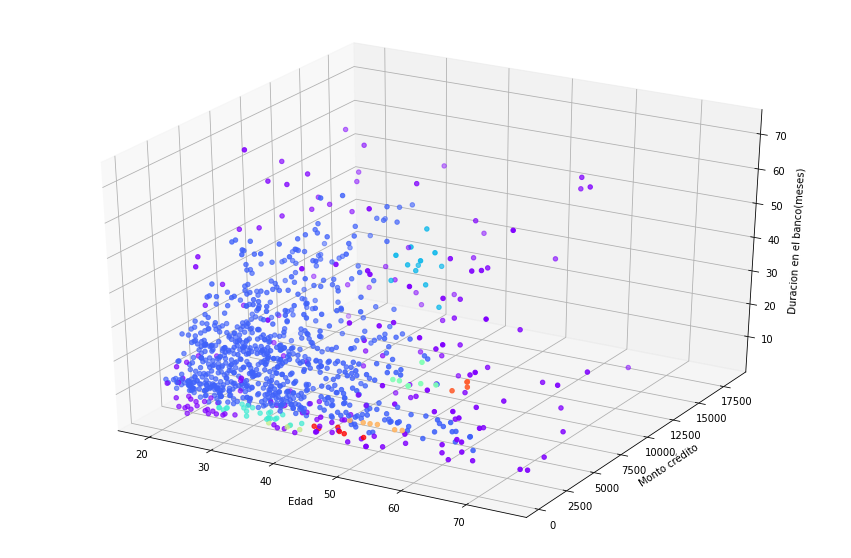

In [ ]:
from sklearn.cluster import DBSCAN
#Si tienes 2 o 3 dim multiplicas las dimensiones por 2
model = DBSCAN(eps=.4, min_samples=6)
model.fit(cluster_scaled)
dbscan_labels = model.labels_

#Codigo para graficar
fig = plt.figure(num=None,figsize=(15,10),facecolor='w',edgecolor='k')
ax = plt.axes(projection='3d')
# Scatter 3D
ax.scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=dbscan_labels,cmap='rainbow')

#Etiquetar los ejes
xlabel= ax.set_xlabel('Edad', linespacing =3.2)
ylabel= ax.set_ylabel('Monto crédito', linespacing =3.2)
zlabel= ax.set_zlabel('Duracion en el banco(meses)', linespacing =3.2)
print('DBSCAN Clustering')

#PCA

In [ ]:
#Dataset De iris
from sklearn.datasets import load_iris
iris_data=load_iris()

In [ ]:
df_data=pd.DataFrame(iris_data.data,columns=iris_data.feature_names,index=None)
df_target=pd.DataFrame(iris_data.target,columns=['class'])
#Imaginando que son UNSUPERVISED
df_target.loc[df_target['class'] ==0, 'Target_names'] = 'setosa'
df_target.loc[df_target['class'] ==1, 'Target_names'] = 'versicolor'
df_target.loc[df_target['class'] ==2, 'Target_names'] = 'virginica'



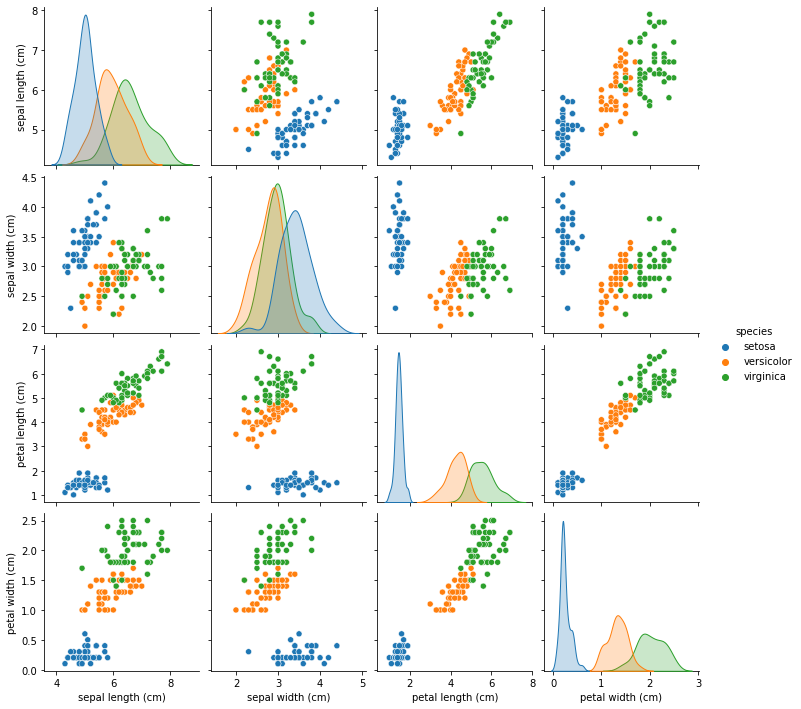

In [ ]:
df_data['species']=df_target['Target_names']
sns.pairplot(data=df_data,kind='scatter', hue='species')

In [ ]:
df_data=df_data.drop(['species'],axis=1)
standardized_data = StandardScaler().fit_transform(df_data)

In [ ]:
from sklearn.decomposition import PCA

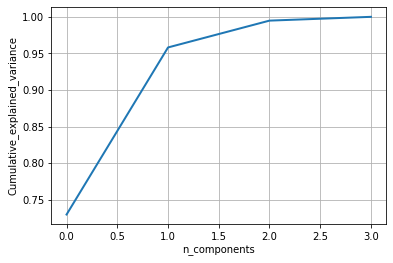

In [ ]:
pca=PCA()
sample_data=standardized_data
pca.n_components = 4
pca_data = pca.fit_transform(sample_data)
#varianza explicada
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
#varianza explicada acumuladoata
cum_var_explained = np.cumsum(percentage_var_explained)
# Ploteamos la informacion
plt.figure(1, figsize=(6, 4))
plt.plot(cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [ ]:
pca.n_components = 2
#Aplicamos la transformacion aneustros datos
pca_data = pca.fit_transform(sample_data)
#creamos df con los componentes de pcs
df_pca= pd.DataFrame(data = pca_data , columns = ['principal_component_1', 'principal_component_2'])

In [ ]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns = df_data.columns.values,
                           index = ['principal_component_1', 'principal_component_2']
                           )

df_pca_comp

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
principal_component_1,0.521066,-0.269347,0.580413,0.564857
principal_component_2,0.377418,0.923296,0.024492,0.066942


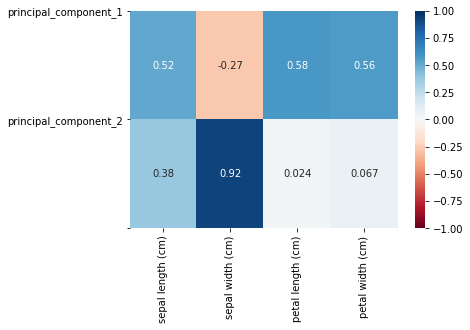

In [ ]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap='RdBu',
            annot=True
            )
plt.yticks([0,1,2],
           ['principal_component_1', 'principal_component_2']
           );

In [ ]:
#Concatenar los componentes a los targets
#Cambiando nuestros 4 Features
#por nustros 2 componentes
df_pred = pd.concat([df_pca,df_target],axis=1)

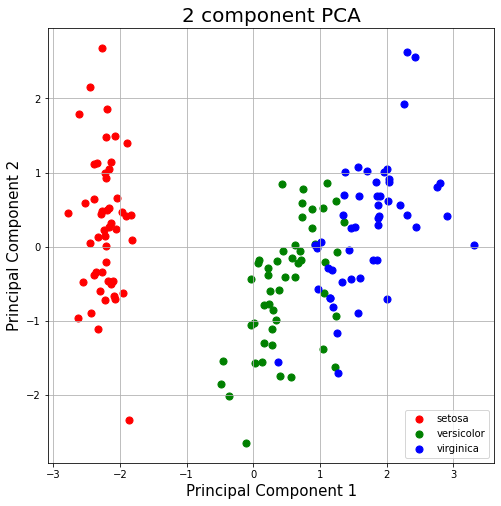

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indices_targets = df_pred['Target_names'] == target
    ax.scatter(df_pred.loc[indices_targets, 'principal_component_1']
               , df_pred.loc[indices_targets, 'principal_component_2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

#TSNE
Al igual que PCA, t-SNE toma datos de alta dimensión y los reduce a un gráfico de baja dimensión (normalmente 2-D). También es una gran técnica de reducción de dimensionalidad. A diferencia de PCA, t-SNE puede reducir dimensiones con relaciones no lineales. En otras palabras, si nuestros datos tuvieran esta distribución no lineal “Swiss Roll” donde el cambio en X o Y no se corresponde con un cambio constante en la otra variable. 

ES computacionalmente muy costoso. Si tienen un dataset que tiene muchos features, es recomendable usar primero PCA 



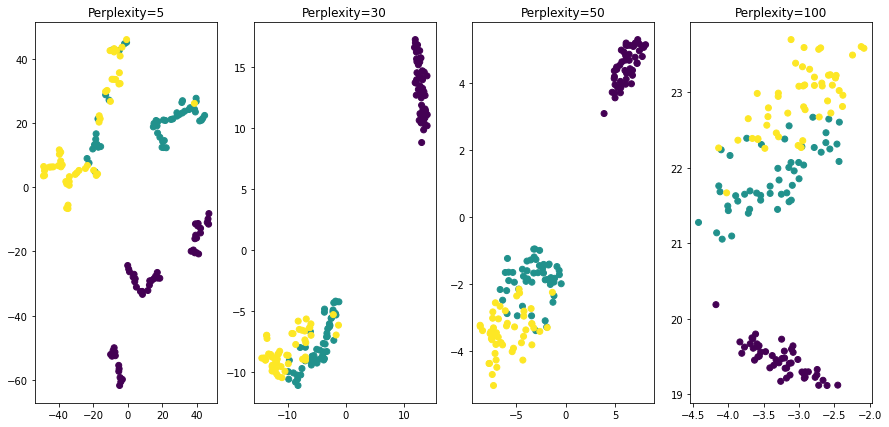

In [ ]:
from sklearn.manifold  import TSNE

fig, ax = plt.subplots(1,4,figsize=(15,7))
for i, perp in enumerate([5,30,50,100]):
  #Perplejidad determina que tan amplio o estrecho es un espacio en t-sne que captura la similitues de los grupos.
  #Si la perplejidad es baja (2), tsne solo usara dos puntos similares y mostrara un grafico dispoerto.
  #Por lo general, se establece entre 5 y 50 
  tsne=TSNE(perplexity=perp,random_state=123)
  x_unida=tsne.fit_transform(df_pred[['principal_component_1','principal_component_2']])
  ax[i].scatter(x_unida[:,0],x_unida[:,1],c=df_pred['class'])
  ax[i].set_title('Perplexity={}'.format(perp))
plt.show()
